## Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958

En 1958, Charles David Keeling  a initié une mesure de la concentration de CO2 dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis qui continue jusqu'à aujourd'hui. L'objectif initial était d'étudier la variation saisonnière, mais l'intérêt s'est déplacé plus tard vers l'étude de la tendance croissante dans le contexte du changement climatique. En honneur à Keeling, ce jeu de données est souvent appelé "Keeling Curve" (voir https://en.wikipedia.org/wiki/Keeling_Curve pour l'histoire et l'importance de ces données).
Les données sont disponibles sur le site Web de l'institut Scripps. Utilisez le fichier avec les observations hebdomadaires. Attention, ce fichier est mis à jour régulièrement avec de nouvelles observations. Notez donc bien la date du téléchargement, et gardez une copie locale de la version précise que vous analysez. Faites aussi attention aux données manquantes.

Votre mission si vous l'acceptez :
1. Réalisez un graphique qui vous montrera une oscillation périodique superposée à une évolution systématique plus lente.
2. Séparez ces deux phénomènes. Caractérisez l'oscillation périodique. Proposez un modèle simple de la contribution lente, estimez ses paramètres et tentez une extrapolation jusqu'à 2025 (dans le but de pouvoir valider le modèle par des observations futures).
3. Déposer dans FUN votre résultat



In [1]:
 # Importing the necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Les données sont disponibles sur le site Web de l'institut Scripps :

In [2]:
# Downloading and loading data
# date : 17/04/2024
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"

In [3]:
# Load data into a pandas table
data = pd.read_csv(data_url, skiprows=44, sep=r'\s+', engine='python', parse_dates=[0], names = ['Date', 'Concentration'])
# Displaying the first rows of data for verification
print(data.head())

        Date  Concentration
0 1958-03-29         316.19
1 1958-04-05         317.31
2 1958-04-12         317.69
3 1958-04-19         317.58
4 1958-04-26         316.48


On enleve toutes les données manquantes :

In [4]:
# All rows containing at least one null value (NaN) in a column are deleted
data = data.dropna()

Pour repondre à la première question, on trace le graphique de l'évolution du taux de CO2 en fonction du temps :

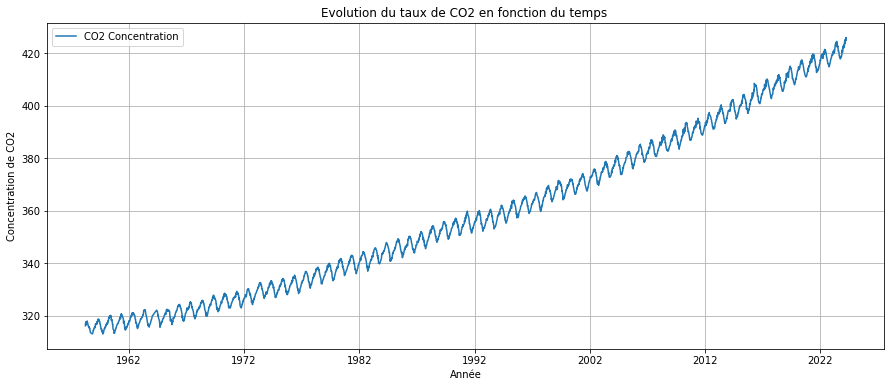

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Concentration'], label='CO2 Concentration')
plt.title('Evolution du taux de CO2 en fonction du temps ')
plt.xlabel('Année')
plt.ylabel('Concentration de CO2')
plt.legend()
plt.grid(True)
plt.show()

On peut voir sur ce graphique comme prévu une oscillation périodique superposée à une évolution systématique plus lente. Pour mieux voir les oscillations, on peut zoomer sur le graphique en ne gardant que certains points, ici les 100 premiers :

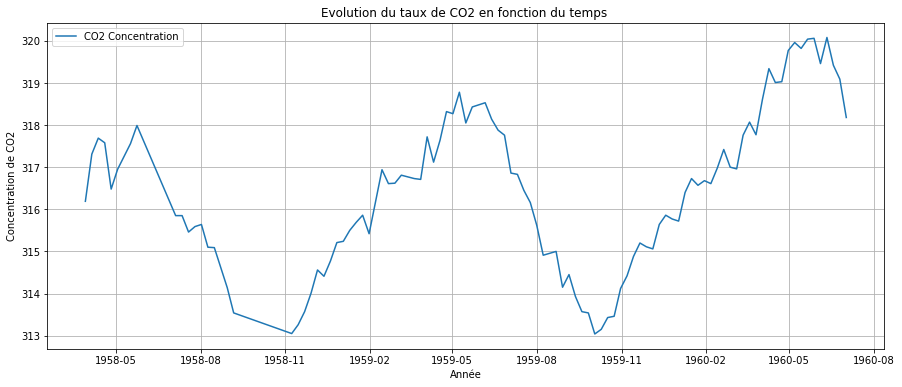

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(data['Date'][:100], data['Concentration'][:100], label='CO2 Concentration')
plt.title('Evolution du taux de CO2 en fonction du temps ')
plt.xlabel('Année')
plt.ylabel('Concentration de CO2')
plt.legend()
plt.grid(True)
plt.show()

On peut directement essayer de caracteriser l'évolution systématique lente en utilisant une regression linéaire :

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.arange(len(data)).reshape(-1,1)
y = np.array(data['Concentration'])

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Get the coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

print("Pente:", slope)
print("Intercept:", intercept)

# Predicting CO2 concentration in 2025
weeks_in_2025 = (2025 - data['Date'].dt.year.min()) * 52
predicted_CO2_2025 = model.predict([[weeks_in_2025]])

print("Concentration de CO2 prédite en 2025:", predicted_CO2_2025[0])

Pente: 0.03176600340625831
Intercept: 305.80004219578547
Concentration de CO2 prédite en 2025: 416.47279806318943


Puis, le plus simple pour separer ces oscillations et l'évolution systematique est de passer pas une comparaison des emissions moyennes de CO2 par an. Pour celui il nous faut calculer les moyennes d'émission de CO2 par année :

In [8]:
nrow = len (data)
years = []
for row in range(nrow):
    year = str(data['Date'][row])[:4]
    years.append(int(year))
data['Year'] = years
print(data.head())

        Date  Concentration  Year
0 1958-03-29         316.19  1958
1 1958-04-05         317.31  1958
2 1958-04-12         317.69  1958
3 1958-04-19         317.58  1958
4 1958-04-26         316.48  1958


Maintenant qu'on a ajouté aux données l'année, on peut calculer la moyenne de la concentration de CO2 par an et l'ajouter aux données :

In [9]:
# Calculate mean concentration by year
data['Mean_Concentration'] = data.groupby('Year')['Concentration'].transform('mean')
print(data.head())

        Date  Concentration  Year  Mean_Concentration
0 1958-03-29         316.19  1958             315.474
1 1958-04-05         317.31  1958             315.474
2 1958-04-12         317.69  1958             315.474
3 1958-04-19         317.58  1958             315.474
4 1958-04-26         316.48  1958             315.474


In [10]:
mean_concentration_by_year = data.groupby('Year')['Concentration'].mean()
print(mean_concentration_by_year.head())


Year
1958    315.474000
1959    315.945417
1960    316.898868
1961    317.634038
1962    318.597708
Name: Concentration, dtype: float64


On peut maintenant faire un graphique pour montrer l'évolution du taux de CO2 en fonction du temps :

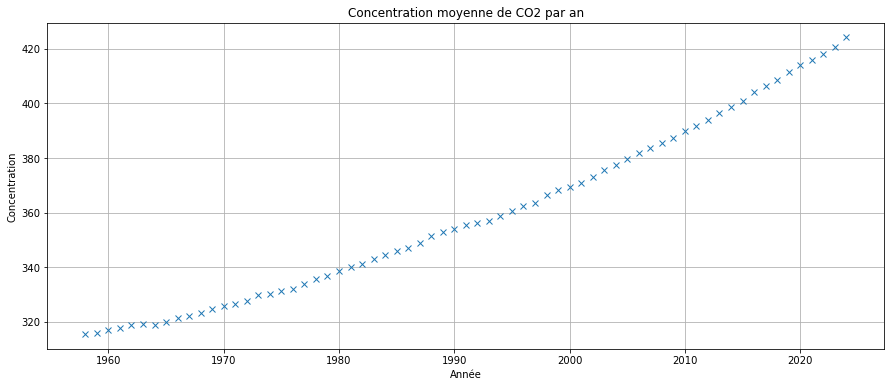

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(mean_concentration_by_year.index, mean_concentration_by_year.values, label='Concentration moyenne de CO2 par an', marker='x', linestyle='')
plt.title('Concentration moyenne de CO2 par an')
plt.xlabel('Année')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

Nous procédons maintenant à l'analyse et à la détermination de l'oscillation périodique.

Pour ce faire, une nouvelle colonne "Oscilation" est créée dans le tableau Pandas avec la différence entre la valeur originale de la concentration de CO2 et la valeur moyenne par an calculée :

In [13]:
data['Oscilation'] = data['Concentration']-data['Mean_Concentration']
print(data.head())

        Date  Concentration  Year  Mean_Concentration  Oscilation
0 1958-03-29         316.19  1958             315.474       0.716
1 1958-04-05         317.31  1958             315.474       1.836
2 1958-04-12         317.69  1958             315.474       2.216
3 1958-04-19         317.58  1958             315.474       2.106
4 1958-04-26         316.48  1958             315.474       1.006


On peut utiliser une représentation graphique :

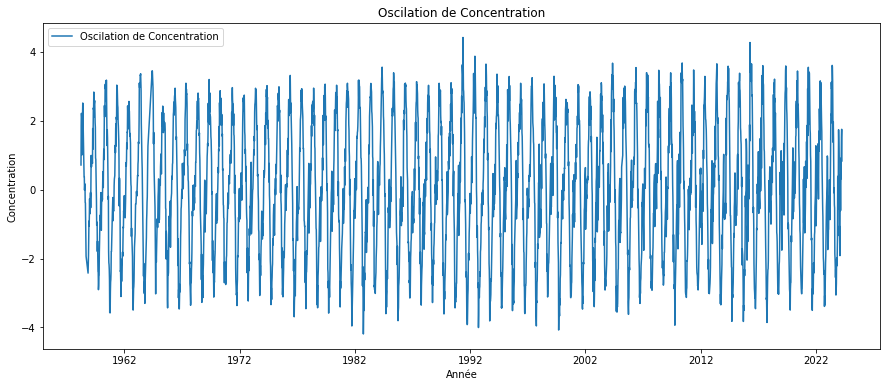

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Oscilation'], label='Oscilation de Concentration')
plt.title('Oscilation de Concentration')
plt.xlabel('Année')
plt.ylabel('Concentration')
plt.legend()
plt.show()

On peut ensuite determiner la période de ces oscillations :

In [17]:
# Periodic oscillation. Calculate the Fourier transform of the CO2 oscilation time series.
co2_oscilation_fft = np.fft.fft(data['Oscilation'])

# Calculate the frequencies corresponding to the Fourier components
n = len(data)
frequencies = np.fft.fftfreq(n, d=1)  # Frequency in cycles per week

# Find the maximum frequency and amplitude
max_freq_index = np.argmax(np.abs(co2_oscilation_fft))
max_freq = frequencies[max_freq_index]
max_amplitude = np.abs(co2_oscilation_fft[max_freq_index])

# Calculate the inverse frequency in weeks per cycle.
max_freq_week_cycles = 1 / max_freq

print("Dominant oscillation frequency:", max_freq_week_cycles, "week/cycles")
print("Maximum oscillation amplitude in CO2 oscilation:", max_amplitude)

# Periodic oscillation. Calculate the maximum and minimum value of the 'Oscillation' column
maximum_value = data['Oscilation'].max()
minimum_value = data['Oscilation'].min()

print("Maximum oscillation amplitude in CO2 periodic oscilation:", maximum_value)
print("Minimum oscillation amplitude in CO2 periodic oscilation:", minimum_value)

Dominant oscillation frequency: 51.86153846153846 week/cycles
Maximum oscillation amplitude in CO2 oscilation: 3238.1102231652067
Maximum oscillation amplitude in CO2 periodic oscilation: 4.419807692307586
Minimum oscillation amplitude in CO2 periodic oscilation: -4.191923076923047
